In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("df_cleaned.csv")

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              40949 non-null  int64 
 1   video_id                40949 non-null  object
 2   trending_date           40949 non-null  object
 3   title                   40949 non-null  object
 4   channel_title           40949 non-null  object
 5   category_id             40949 non-null  int64 
 6   publish_time            40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  comments_disabled       40949 non-null  bool  
 12  ratings_disabled        40949 non-null  bool  
 13  video_error_or_removed  40949 non-null  bool  
 14  genre                   40949 non-null  object
dtypes:

In [8]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [9]:
import numpy as np


In [10]:
df1=df[['views','comment_count','likes','dislikes','genre']]

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df1['genre'])
df1['genre'] = le.transform(df1['genre'])

C:\Users\karthik chary\AppData\Local\Temp\ipykernel_5644\1761747593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['genre'] = le.transform(df1['genre'])


In [12]:
df1['genre'].unique()

array([10,  3,  1, 12,  4,  8, 14,  7, 11,  2,  6,  0, 15,  5,  9, 13])

In [13]:
df1

,views,comment_count,likes,dislikes,genre
0,748374,15954,57527,2966,10
1,98966,532,2486,184,10
2,321053,895,4451,1772,10
3,197062,456,7250,217,10
4,2744430,6541,115426,1110,10
...,...,...,...,...,...
40944,1324482,1644,22413,608,13
40945,1332252,1648,22461,610,13
40946,1340039,1648,22504,615,13
40947,1345086,1649,22542,615,13


In [27]:
df1_genre = dict(zip(df['genre'],df1['genre']))

In [28]:
df1_genre

{'People & Blogs': 10,
 'Entertainment': 3,
 'Comedy': 1,
 'Science & Technology': 12,
 'Film & Animation': 4,
 'News & Politics': 8,
 'Sports': 14,
 'Music': 7,
 'Pets & Animals': 11,
 'Education': 2,
 'Howto & Style': 6,
 'Autos & Vehicles': 0,
 'Travel & Events': 15,
 'Gaming': 5,
 'Nonprofits & Activism': 9,
 'Shows': 13}

In [24]:
df_g = pd.read_json("US_category_id (1).json")

In [26]:
genre = [df_g['items'][i]['snippet']['title'] for i in range(len(df_g))]

In [16]:
import seaborn as sns

<Axes: >

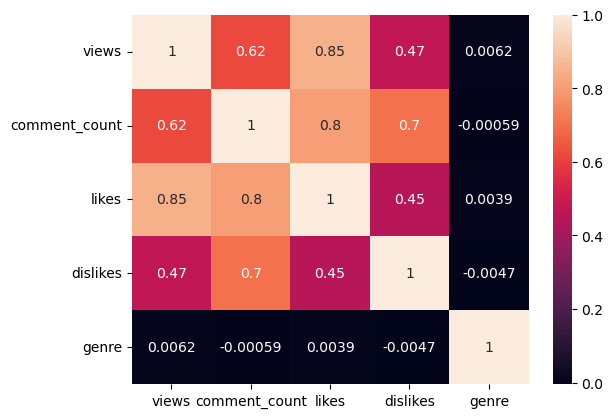

In [17]:
sns.heatmap(df1.corr(),annot=True)


In [18]:
X = df1[['views','comment_count','dislikes','genre']]
y=df1['likes']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
X

,views,comment_count,dislikes,genre
0,748374,15954,2966,10
1,98966,532,184,10
2,321053,895,1772,10
3,197062,456,217,10
4,2744430,6541,1110,10
...,...,...,...,...
40944,1324482,1644,608,13
40945,1332252,1648,610,13
40946,1340039,1648,615,13
40947,1345086,1649,615,13


In [20]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
lr.score(X_test,y_test)

0.8883282601892243

In [29]:
import pickle
with open("model_pickle",'rb')as mod:
    model=pickle.load(mod)